In [1]:
! pip install spacy --quiet
! python3 -m spacy download en_core_web_sm 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


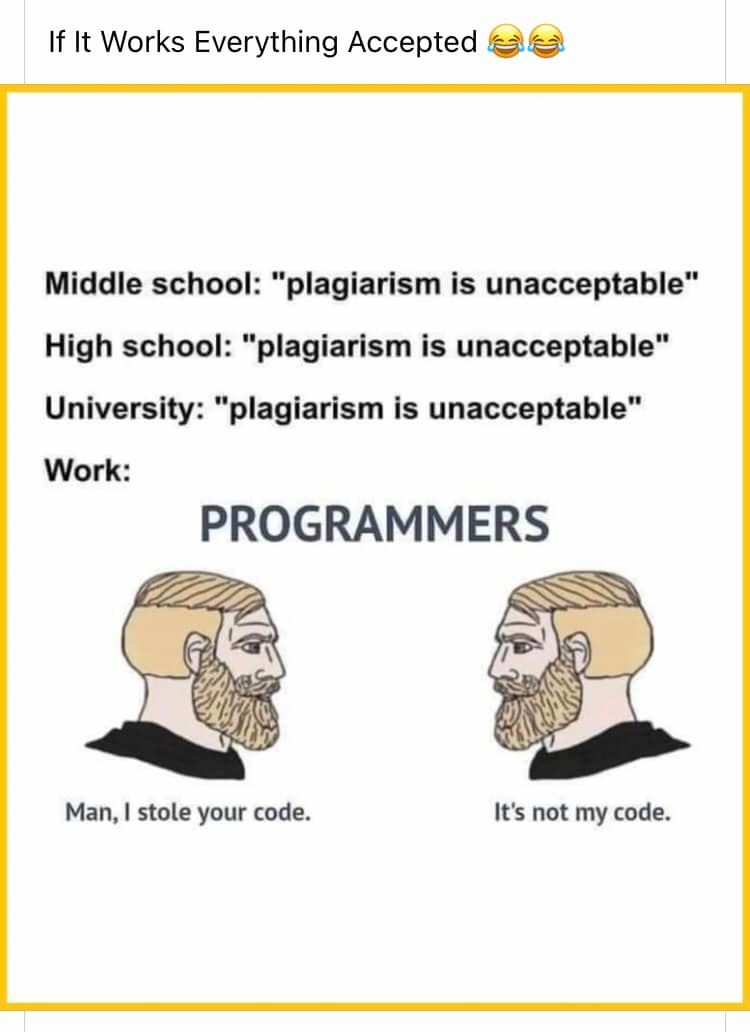

<a target="_blank" href="https://colab.research.google.com/github/ejcv/NLP_course/blob/main/first_session_nlp_course.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

# Introduction

NLP is a subfield of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages. It is used to apply machine learning algorithms to text and speech.

NLP has three main components: **morphological analysis**, **syntactic analysis**, and **semantic analysis**. Morphological analysis breaks words into their basic components, syntactic analysis examines how words are put together to form sentences, and semantic analysis focuses on the meaning of the words and sentences.

NLP is used in many different fields, including machine translation, document summarization, speech recognition, topic segmentation, relationship extraction, question answering, sentiment analysis, and spam filtering.

In this first session we will cover the following topics:

- **Tokenization**: Splitting text into tokens (words, punctuation marks, etc.)
- **N-Grams**: Sequences of N tokens
- **Part-of-speech tagging**: Identifying the part of speech for each token
- **Stopword removal**: Filtering out "meaningless" words
- **Stemming and lemmatization**: Reducing related words to a common stem or lemma
- **Bag of words**: Converting text into the bag-of-words format
- **TF-IDF**: Computing word importance

## ⚠️ Computers dont understand text! (including chatgpt 🤖)

Computers only understand numbers. We need to convert text to numbers to do anything useful with it. This is called **feature extraction** or **feature encoding**.

## 🤔 How do we convert text to numbers?

There are many ways to do this, but the most common approaches are:

- **Bag of words**: Represent the text as the bag (multiset) of its words, disregarding grammar and word order but keeping multiplicity.
- **TF-IDF**: Weigh words by how often they appear in the text, discounting words that appear frequently across all texts.

But before we even do that, we need to "clean" the text by removing stopwords, punctuation, and other "noise". This step is called **text preprocessing**.


# Building blocks of preprocessing 🧱🧱

## Word Tokenization in NLP

Word tokenization is a crucial preprocessing step in Natural Language Processing (NLP) that involves dividing a given text or sentence into individual words or tokens. This process is essential because most NLP algorithms and models rely on text representations as sequences of words or tokens to analyze and understand the language.

The steps involved in word tokenization are as follows:

1. **Input Text:** Begin with a piece of text, which can be a sentence, paragraph, or an entire document, depending on the NLP task.

2. **Tokenization:** Tokenize the input text into individual words or tokens using various methods, such as space-based tokenization, punctuation-based tokenization, rule-based tokenization, or language-specific tokenization.

3. **Handling Special Cases:** Address special cases, such as abbreviations, acronyms, or compound words, to ensure proper token segmentation.

4. **Normalization:** Optionally, normalize tokens to lowercase for case-insensitivity or handling word variations.

Word tokenization enables us to process and analyze text on a word-level basis, making it possible to perform various NLP tasks, including sentiment analysis, named entity recognition, machine translation, and more. Proper tokenization ensures meaningful representations of language data that can be utilized as input for different NLP algorithms and models.

In [2]:
text = """Welcome to ChatGPT, an AI language model powered by OpenAI. This is a demo of the model's capabilities. 
It can understand various languages, including English, Spanish, and French. Don't hesitate to ask questions and use contractions like can't and won't. 
By the way, this sentence contains a hyphenated word: state-of-the-art. AI is fascinating and full of surprises! Make sure to handle acronyms like USA and NASA properly.
"""

# We can see the text includes several sentences, and it contains a hyphenated word, a contraction, and an acronym. 


## Naive solution 🫣
Using the split() method from python.

In [3]:
text.split(' ')[10:20],text.split(' ')[-10:]

(['This',
  'is',
  'a',
  'demo',
  'of',
  'the',
  "model's",
  'capabilities.',
  '\nIt',
  'can'],
 ['Make',
  'sure',
  'to',
  'handle',
  'acronyms',
  'like',
  'USA',
  'and',
  'NASA',
  'properly.\n'])

## A more serious approach
We can first clean the text a little bit, and then split it into words.

In [4]:
import re

def preprocess_text(text: str) -> str:
    """ A function that gets rid of punctuation, 
    special characters and extra spaces. 
    
    """
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # Remove special characters
    text = re.sub(r'\s+', ' ', text) # Remove extra spaces
    return text
    

In [5]:
preprocess_text(text).split(' ')[:10], preprocess_text(text).split( )[-10:]

(['Welcome',
  'to',
  'ChatGPT',
  'an',
  'AI',
  'language',
  'model',
  'powered',
  'by',
  'OpenAI'],
 ['Make',
  'sure',
  'to',
  'handle',
  'acronyms',
  'like',
  'USA',
  'and',
  'NASA',
  'properly'])

We are still facing some problems, like compound words, abbreviations, etc.

## NLTK library
We can continue complicating the process and adding more rules, but we will never be able to cover all the cases. Luckily, there are libraries that can help us with this task.

The NLTK library includes several tokenizers that can help us with this task.


In [6]:
from nltk import word_tokenize

def tokenize_text(text: str) -> list:
    """ A function that tokenizes text into words. """
    return word_tokenize(text)

tokenize_text(preprocess_text(text))[:10], tokenize_text(preprocess_text(text))[30:45]

(['Welcome',
  'to',
  'ChatGPT',
  'an',
  'AI',
  'language',
  'model',
  'powered',
  'by',
  'OpenAI'],
 ['to',
  'ask',
  'questions',
  'and',
  'use',
  'contractions',
  'like',
  'cant',
  'and',
  'wont',
  'By',
  'the',
  'way',
  'this',
  'sentence'])

NLTK uses a model called PunktSentenceTokenizer. This model is trained to tokenize sentences or words in a given language. NLTK also includes a pre-trained PunktSentenceTokenizer for English.

But we are not done yet, let's say we want to count the times a word appears in a text. We need to make sure that we are counting the same word, and not different variations of it.

That is where lemmatisation and stemming come into play.

## Lemmatisation 🥊 Stemming

Lemmatisation and stemming are two popular text normalization techniques that are used to prepare text for further processing. Both techniques are used to reduce the inflectional forms of words to their root forms so that they can be analyzed as a single item, rather than as multiple words.

For example:

- **Stemming:** The root form of the word "arguing" is "argu", and the root form of the word "argument" is "argument".
- **Lemmatisation:** The root form of the word "arguing" is "argue", and the root form of the word "argument" is "argument".


In [7]:
# Lets compare stemming and lemmatisation
from nltk.stem import PorterStemmer, WordNetLemmatizer

def stem_text(tokens: list) -> list:
    """ A function that stems text. """
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

def lemmatize_text(tokens: list) -> list:
    """ A function that lemmatizes text. """
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

stem_text(tokenize_text(text))[30:45], lemmatize_text(tokenize_text(text))[30:45]


([',',
  'spanish',
  ',',
  'and',
  'french',
  '.',
  'do',
  "n't",
  'hesit',
  'to',
  'ask',
  'question',
  'and',
  'use',
  'contract'],
 [',',
  'Spanish',
  ',',
  'and',
  'French',
  '.',
  'Do',
  "n't",
  'hesitate',
  'to',
  'ask',
  'question',
  'and',
  'use',
  'contraction'])

In [8]:
stem_text(tokenize_text(text))[-10:], lemmatize_text(tokenize_text(text))[-10:]


(['sure',
  'to',
  'handl',
  'acronym',
  'like',
  'usa',
  'and',
  'nasa',
  'properli',
  '.'],
 ['sure',
  'to',
  'handle',
  'acronym',
  'like',
  'USA',
  'and',
  'NASA',
  'properly',
  '.'])

We can clearly see the differences between the two techniques. Stemming is a crude method that simply chops off the end of a word using heuristics, without taking into account the context of the word. Lemmatisation, on the other hand, uses a more informed analysis to create groups of words with similar meaning based on the context around the word.

But lemmatisation can get things wrong without context, for example, the word "better" can be a comparative adjective or an adverb, and the lemma of "better" is "good". So, if we lemmatize the word "better" without context, we will get "good" as the lemma, which is not correct. This is were Part-of-speech tagging comes into play.

## Part Of Speech Tagging

Part-of-speech tagging is the process of assigning a part-of-speech tag to each word in a given text (corpus). A part-of-speech tag is a special label assigned to each token (word) in a text corpus to indicate the part of speech and often also other grammatical categories such as tense, number (plural/singular), case etc. Part-of-speech tagging is also known as grammatical tagging or word-category disambiguation.

In [9]:
# lets do pos tagging and then lemmatisation
from nltk import pos_tag

def pos_tag_text(tokens: list) -> list:
    """ A function that tags text with parts of speech. """
    return pos_tag(tokens)

tagged_tokens = pos_tag_text(tokenize_text(text))
tagged_tokens[30:55]

[(',', ','),
 ('Spanish', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 ('French', 'NNP'),
 ('.', '.'),
 ('Do', 'VBP'),
 ("n't", 'RB'),
 ('hesitate', 'VB'),
 ('to', 'TO'),
 ('ask', 'VB'),
 ('questions', 'NNS'),
 ('and', 'CC'),
 ('use', 'VBP'),
 ('contractions', 'NNS'),
 ('like', 'IN'),
 ('ca', 'MD'),
 ("n't", 'RB'),
 ('and', 'CC'),
 ('wo', 'MD'),
 ("n't", 'RB'),
 ('.', '.'),
 ('By', 'IN'),
 ('the', 'DT'),
 ('way', 'NN')]

You can find a table with the different tags meanings [here](https://www.guru99.com/pos-tagging-chunking-nltk.html).

In [10]:
# now that they are tagged we can use the tags to lemmatise
from nltk.stem import WordNetLemmatizer 

def lemmatize_tagged_text(tagged_tokens: list) -> list:
    """ A function that lemmatizes text based on its parts of speech. """
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token, tag) if tag != None else token for token, tag in tagged_tokens ]

try:
  lemmatize_tagged_text(tagged_tokens)[30:45]
except Exception as e:
  # this is not the best way, but to avoid changing the workflow, lets keep it
  print(f"KeyError: {e}")



KeyError: 'VB'

In [11]:
from nltk.corpus import wordnet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
wordnet_compt_tokens = [(tok, get_wordnet_pos(tag))for tok, tag in tagged_tokens]
wordnet_compt_tokens[30:55]

[(',', None),
 ('Spanish', 'n'),
 (',', None),
 ('and', None),
 ('French', 'n'),
 ('.', None),
 ('Do', 'v'),
 ("n't", 'r'),
 ('hesitate', 'v'),
 ('to', None),
 ('ask', 'v'),
 ('questions', 'n'),
 ('and', None),
 ('use', 'v'),
 ('contractions', 'n'),
 ('like', None),
 ('ca', None),
 ("n't", 'r'),
 ('and', None),
 ('wo', None),
 ("n't", 'r'),
 ('.', None),
 ('By', None),
 ('the', None),
 ('way', 'n')]

In [12]:
lemmatize_tagged_text(wordnet_compt_tokens)[30:45]

[',',
 'Spanish',
 ',',
 'and',
 'French',
 '.',
 'Do',
 "n't",
 'hesitate',
 'to',
 'ask',
 'question',
 'and',
 'use',
 'contraction']

## Another library to do Pos tagging is Spacy 
Spacy is a library for NLP that has a lot of the features we have seen so far, and more. 

In [13]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp(text)

In [14]:
for token in doc[10:30]:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

OpenAI OpenAI PROPN NNP pobj XxxxXX True False
. . PUNCT . punct . False False
This this PRON DT nsubj Xxxx True True
is be AUX VBZ ROOT xx True True
a a DET DT det x True True
demo demo NOUN NN attr xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
model model NOUN NN poss xxxx True False
's 's PART POS case 'x False True
capabilities capability NOUN NNS pobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE _SP dep 
 False False
It it PRON PRP nsubj Xx True True
can can AUX MD aux xxx True True
understand understand VERB VB ROOT xxxx True False
various various ADJ JJ amod xxxx True True
languages language NOUN NNS dobj xxxx True False
, , PUNCT , punct , False False
including include VERB VBG prep xxxx True False


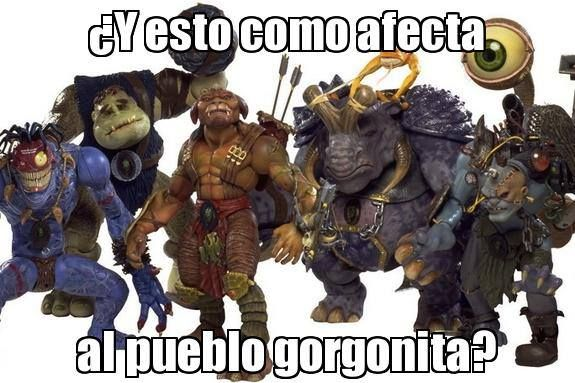

## Exercise classify a document

Now that we have seen some of the basic NLP preprocessing techniques, let's try to classify some text.

We downloaded this [dataset](https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text?resource=download) from Kaggle. It contains a set of tweets labeled with the emotion they express.

## Bag of words 🛍️

We will start with a simple (yet powerful) technique called Bag of Words. This technique consists of counting the number of times a word appears in a document. We can use this technique to convert a document into a vector of numbers.




In [15]:
# first lets load the dataset into a pandas dataframe
import pandas as pd
df = pd.read_csv('datasets/tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [16]:
df.shape

(40000, 3)

In [17]:
# the first step would be to assign a numeric value to each sentiment
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [18]:
# we enumerate the unique values and then convert it to a dictionary where the key is the index and the value is the sentiment
id2sent = dict(enumerate(df['sentiment'].unique()))
sent2id = {v:k for k,v in id2sent.items()}
id2sent

{0: 'empty',
 1: 'sadness',
 2: 'enthusiasm',
 3: 'neutral',
 4: 'worry',
 5: 'surprise',
 6: 'love',
 7: 'fun',
 8: 'hate',
 9: 'happiness',
 10: 'boredom',
 11: 'relief',
 12: 'anger'}

In [19]:
# now we can create a column with the numeric values
df['sentiment_id'] = df['sentiment'].map(sent2id)
df.head()

,tweet_id,sentiment,content,sentiment_id
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,0
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,1
2,1956967696,sadness,Funeral ceremony...gloomy friday...,1
3,1956967789,enthusiasm,wants to hang out with friends SOON!,2
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,3


In [20]:
# Lets apply what we learnt so far to preprocess the text
# the first step would be to explore the different types of text we have
# lets get a random sample and see what we have
for _, row in df.sample(10).iterrows():
    print(row['content'])
    print(row['sentiment'])
    print('----------------------')

@mrspaulkjonas No, havent heard anything about the show   It hasnt been on on saturday nights, but there are the occasional sunday reruns.
neutral
----------------------
Happy Mother's Day @shannon180
love
----------------------
@danachs I am lost. Please help me find a good home.
worry
----------------------
@laurenhobeast As much as I loved Texas, my dislike for needles could interfere.
love
----------------------
@exorre Our raid leader made us run drills to practice switching
worry
----------------------
loves twitter (Y) 38th post. mwaha  x
love
----------------------
@smartie999 That's me on a good day
sadness
----------------------
@DutchReaganite So am I.
neutral
----------------------
CRYING CUZ PEOPLE WONT FOLLOW ME!!!!!!!
worry
----------------------
I'm scared to set the pw on my BB bc I might forget it &amp; end up losing all my data. But yet I have financial info on it. Catch 22
worry
----------------------


In [21]:
# We can see there are usernames that we dont need, a mix of lower and uppercase, some special characters (parenthesis, exclamations and question marks, etc), triple dots, abbreviations, etc
# lets start by removing the usernames
import re
def remove_usernames(text: str) -> str:
    """ A function that removes usernames from text. """
    return re.sub(r'@\w+', '', text)

remove_usernames('@user hello world @user') # test


' hello world '

In [22]:
# lets remove special characters, triple dots, double spaces, punctuation, etc
def preprocess_text(text: str) -> str:
    """ A function that gets rid of punctuation, 
    special characters and extra spaces. 
    
    """
    text = text.lower() # turn everything to lowercase
    text = re.sub(r'[^\w\s]', ' ', text) # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # Remove special characters
    text = re.sub(r'\s+', ' ', text) # Remove extra spaces

    return text

preprocess_text('HeLlo.World! #this is;, (a bad str!ng)...    2023 is the year') # test

'hello world this is a bad str ng 2023 is the year'

In [23]:
# with what we have learnt so far we cant handle abbreviations, we won't cover that here
# but if interested you can search for grammar correctors, using an exhaustive dictionary, or even a probabilistic model

# lets put everything together and apply it to the dataframe
df['content'] = df['content'].apply(remove_usernames).apply(preprocess_text)
df.head()

,tweet_id,sentiment,content,sentiment_id
0,1956967341,empty,i know i was listenin to bad habit earlier an...,0
1,1956967666,sadness,layin n bed with a headache ughhhh waitin on y...,1
2,1956967696,sadness,funeral ceremony gloomy friday,1
3,1956967789,enthusiasm,wants to hang out with friends soon,2
4,1956968416,neutral,we want to trade with someone who has houston...,3


In [24]:
# now that we have preprocessed the text we can tokenize it
# we can use a simple tokenizer from nltk and then lemmatize the tokens, so we can reduce the number of tokens 
# words like 'running' and 'run' will be converted to 'run' and grouped together

def tokenize_text(text: str) -> list:
    """ A function that tokenizes text into words. """
    tokens = word_tokenize(text)
    pos_tagged_tokens = pos_tag(tokens)
    wordnet_compt_tokens = [(tok, get_wordnet_pos(tag))for tok, tag in pos_tagged_tokens]
    lemmatized_tokens = lemmatize_tagged_text(wordnet_compt_tokens)
    return lemmatized_tokens

tokenize_text('i am running and eating while i write a poem') # test
    

['i', 'be', 'run', 'and', 'eat', 'while', 'i', 'write', 'a', 'poem']

In [25]:

# lets apply the tokenizer to the dataframe
df['tokens'] = df['content'].apply(tokenize_text)
df.head()

,tweet_id,sentiment,content,sentiment_id,tokens
0,1956967341,empty,i know i was listenin to bad habit earlier an...,0,"[i, know, i, be, listenin, to, bad, habit, ear..."
1,1956967666,sadness,layin n bed with a headache ughhhh waitin on y...,1,"[layin, n, bed, with, a, headache, ughhhh, wai..."
2,1956967696,sadness,funeral ceremony gloomy friday,1,"[funeral, ceremony, gloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends soon,2,"[want, to, hang, out, with, friend, soon]"
4,1956968416,neutral,we want to trade with someone who has houston...,3,"[we, want, to, trade, with, someone, who, have..."


In [26]:
# There is an extra preprocessing technique we can use, that we haven't seen yet, and that is stop words removal
# Stop words are words that are very common in a language and don't add much meaning to a sentence
# Examples of stop words are 'the', 'a', 'an', 'and', 'or', etc
# We can use the stop words from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [27]:
# we do this after tokenizing the text, because the pos tagging works better with these words as context, it can tell if the word is a verb or a noun, etc
def remove_stop_words(tokens: list) -> list:
    """ A function that removes stop words from tokens. """
    return [token for token in tokens if token not in stop_words]

remove_stop_words(tokenize_text('i am running and eating while i write a poem')) # test

['run', 'eat', 'write', 'poem']

In [28]:
# lets apply the stop words removal to the dataframe
df['tokens'] = df['tokens'].apply(remove_stop_words)
df.head()

,tweet_id,sentiment,content,sentiment_id,tokens
0,1956967341,empty,i know i was listenin to bad habit earlier an...,0,"[know, listenin, bad, habit, earlier, start, f..."
1,1956967666,sadness,layin n bed with a headache ughhhh waitin on y...,1,"[layin, n, bed, headache, ughhhh, waitin, call]"
2,1956967696,sadness,funeral ceremony gloomy friday,1,"[funeral, ceremony, gloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends soon,2,"[want, hang, friend, soon]"
4,1956968416,neutral,we want to trade with someone who has houston...,3,"[want, trade, someone, houston, ticket, one]"


In [29]:
# now that we have preprocessed the text we can start building our model
# we will use a simple bag of words model, where we will count the number of times a word appears in a sentence


# lets do it manually first
# we will create a dictionary where the key is the word and the value is the number of times it appears in the sentence
# we will use the first sentence as an example
# lets suppose we have a corpus of 3 sentences
corpus = ['I am running and eating while I write a poem', 'I am a data scientist who likes to run in the park with my dog', 'I enjoy watching movies with my friends']

tokens_lst = [tokenize_text(sentence) for sentence in corpus]
tokens_lst

[['I', 'be', 'run', 'and', 'eat', 'while', 'I', 'write', 'a', 'poem'],
 ['I',
  'be',
  'a',
  'data',
  'scientist',
  'who',
  'like',
  'to',
  'run',
  'in',
  'the',
  'park',
  'with',
  'my',
  'dog'],
 ['I', 'enjoy', 'watch', 'movie', 'with', 'my', 'friend']]

In [30]:
# we will create a dictionary where the key is the word and the value is the number of times it appears in the sentence
# the vocabulary will be the set of unique words in the corpus
vocab ={token: idx for idx, token in enumerate(set([token for tokens in tokens_lst for token in tokens]))}
vocab

{'who': 0,
 'run': 1,
 'park': 2,
 'friend': 3,
 'in': 4,
 'and': 5,
 'write': 6,
 'movie': 7,
 'watch': 8,
 'poem': 9,
 'with': 10,
 'dog': 11,
 'while': 12,
 'enjoy': 13,
 'a': 14,
 'to': 15,
 'like': 16,
 'my': 17,
 'I': 18,
 'eat': 19,
 'the': 20,
 'be': 21,
 'data': 22,
 'scientist': 23}

In [31]:
# we will create a vector for each sentence, where the length of the vector is the length of the vocabulary
# the value of each element in the vector will be the number of times the word appears in the sentence
bow = [[token.count(word) for word in vocab] for token in tokens_lst]
bow

[[0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
 [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]]

In [32]:
# as you can see the vocab takes all the unique words in the corpus and assigns a number to each one, and then we go through 
# each sentence and count the number of times each word appears in the sentence

# this is a very time consuming process, fortunately, we have libraries that can do this for us
# we will use the CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# we will use the same corpus as before

# we will create an instance of the CountVectorizer
vectorizer = CountVectorizer()

# we will fit the vectorizer to the corpus
vectorizer.fit(corpus)

# we will get the vocabulary
vectorizer.vocabulary_

{'am': 0,
 'running': 14,
 'and': 1,
 'eating': 4,
 'while': 19,
 'write': 22,
 'poem': 12,
 'data': 2,
 'scientist': 15,
 'who': 20,
 'likes': 8,
 'to': 17,
 'run': 13,
 'in': 7,
 'the': 16,
 'park': 11,
 'with': 21,
 'my': 10,
 'dog': 3,
 'enjoy': 5,
 'watching': 18,
 'movies': 9,
 'friends': 6}

In [33]:
# we will transform the corpus into a bag of words
bow = vectorizer.transform(corpus)
bow.toarray()

array([[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1],
       [1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0]])

In [34]:
# we can see the "I" was removed. The count vectorizer implementation removes stop words by default, and does tokenization
# We already have our text preprocessed, so we will turn off the tokenization and stop words removal
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x,lowercase=False, token_pattern=None)



# we will fit the vectorizer to the corpus
# but now the corpus is the list of tokens in the dataframe
vectorizer.fit(df['tokens'].tolist())


# we will get the vocabulary size
len(vectorizer.vocabulary_)

28123

In [35]:
# we will transform the corpus into a bag of words
# important, we need to wrap the tokens in a list, this is because we turned off the preprocessing and tokenization 
df['bow'] = df['tokens'].apply(lambda x: vectorizer.transform([x]).toarray()[0])
df.head()

,tweet_id,sentiment,content,sentiment_id,tokens,bow
0,1956967341,empty,i know i was listenin to bad habit earlier an...,0,"[know, listenin, bad, habit, earlier, start, f...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1956967666,sadness,layin n bed with a headache ughhhh waitin on y...,1,"[layin, n, bed, headache, ughhhh, waitin, call]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1956967696,sadness,funeral ceremony gloomy friday,1,"[funeral, ceremony, gloomy, friday]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1956967789,enthusiasm,wants to hang out with friends soon,2,"[want, hang, friend, soon]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1956968416,neutral,we want to trade with someone who has houston...,3,"[want, trade, someone, houston, ticket, one]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [40]:
# now that we have the bag of words we can start building our model
# we will use a simple logistic regression model for multiclass
# we will use the bow as the input and the sentiment_id as the target
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# for demo purposes we won't use the whole dataset
sample_df = df.sample(2000)

# we will split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(sample_df['bow'].tolist(), sample_df['sentiment_id'].tolist(), test_size=0.2, random_state=42)

# we will create an instance of the model
model = LogisticRegression()

# we will fit the model to the training data
model.fit(X_train, y_train)

# we will get the predictions
y_pred = model.predict(X_test)

# we will get the accuracy
accuracy_score(y_test, y_pred)

0.31

/Users/ernesto/miniforge3/envs/hackathon/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# mention tfidf and ngrams